## 自然语言处理：应用-情感分析-数据预处理
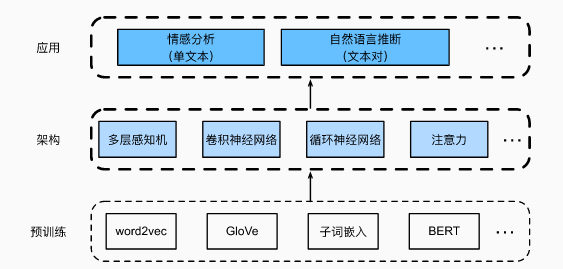

In [1]:
# 情感分析-数据预处理
import os
import torch
from torch import nn
import dltools

In [ ]:
# 读取数据集
def read_imdb(data_dir, is_train):
    """读取IMDb评论数据集文本序列和标签"""
    data, labels = [], []
    for label in ('pos', 'neg'):
        folder_name = os.path.join(data_dir, 'train' if is_train else 'test',label)
        for file in os.listdir(folder_name):
            with open(os.path.join(folder_name, file), 'rb') as f:
                review = f.read().decode('utf-8').replace('\n', '')
                data.append(review)
                labels.append(1 if label == 'pos' else 0)
    return data, labels

data_dir="E:/data/aclImdb/"
train_data = read_imdb(data_dir, is_train=True)
print('训练集数目：', len(train_data[0]))
for x, y in zip(train_data[0][:3], train_data[1][:3]):
    print('标签：', y, 'review:', x[0:60])

In [ ]:
# 数据预处理
train_tokens = dltools.tokenize(train_data[0], token='word')
vocab = dltools.Vocab(train_tokens, min_freq=5, reserved_tokens=['<pad>'])

In [ ]:
dltools.set_figsize()
dltools.plt.xlabel('# tokens per review')
dltools.plt.ylabel('count')
dltools.plt.hist([len(line) for line in train_tokens], bins=range(0, 1000, 50));

In [ ]:
num_steps = 500  # 序列长度
train_features = torch.tensor([dltools.truncate_pad(vocab[line], num_steps, vocab['<pad>']) for line in train_tokens])
print(train_features.shape)

In [ ]:
# 创建数据
train_iter = dltools.load_array((train_features,torch.tensor(train_data[1])), 64)

for X, y in train_iter:
    print('X:', X.shape, ', y:', y.shape)
    break
print('小批量数目：', len(train_iter))

In [ ]:
# 整合代码
def load_data_imdb(batch_size, num_steps=500):
    """返回数据迭代器和IMDb评论数据集的词表"""
    data_dir = dltools.download_extract('aclImdb', 'aclImdb')
    train_data = read_imdb(data_dir, True)
    test_data = read_imdb(data_dir, False)
    train_tokens = dltools.tokenize(train_data[0], token='word')
    test_tokens = dltools.tokenize(test_data[0], token='word')
    vocab = dltools.Vocab(train_tokens, min_freq=5)
    train_features = torch.tensor([dltools.truncate_pad(vocab[line], num_steps, vocab['<pad>']) for line in train_tokens])
    test_features = torch.tensor([dltools.truncate_pad(vocab[line], num_steps, vocab['<pad>']) for line in test_tokens])
    train_iter = dltools.load_array((train_features, torch.tensor(train_data[1])),batch_size)
    test_iter = dltools.load_array((test_features, torch.tensor(test_data[1])),batch_size,is_train=False)
    return train_iter, test_iter, vocab